In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


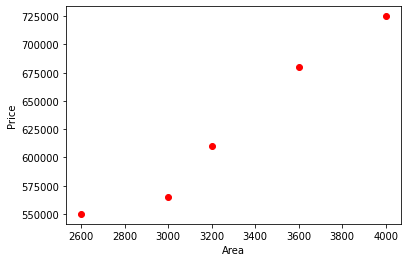

In [14]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df['area'], df['price'], color='red')

In [15]:
model = linear_model.LinearRegression()
model.fit(df[['area']], df['price'])

LinearRegression()

In [16]:
model.predict([[3300]])

C:\Users\abir8\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [17]:
model.coef_

array([135.78767123])

In [18]:
model.intercept_

180616.43835616432

In [19]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [20]:
df_new = pd.read_csv("areas.csv")
df_new

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [21]:
pred = model.predict(df_new)
pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [22]:
df_new['price'] = pred

In [23]:
df_new

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [24]:
df_new.to_csv("areas_new.csv", index=False)

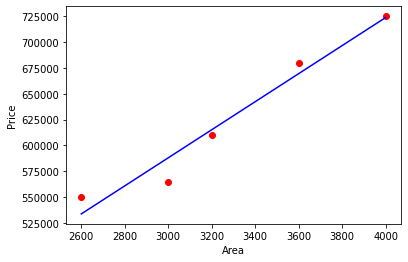

In [25]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df['area'], df['price'], color='red')
plt.plot(df['area'], model.predict(df[['area']]), color='blue')

### Exercise

In [26]:
df_canada = pd.read_csv("canada_per_capita_income.csv")
df_canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [27]:
model1 = linear_model.LinearRegression()
model1.fit(df_canada[['year']], df_canada['per capita income (US$)'])

LinearRegression()

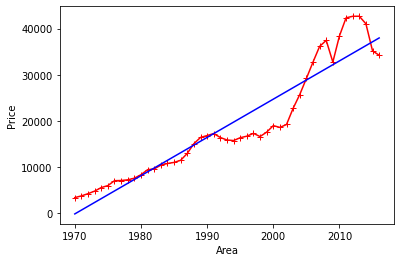

In [29]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.plot(df_canada['year'], df_canada['per capita income (US$)'], color='red', marker='+')
plt.plot(df_canada['year'], model1.predict(df_canada[['year']]), color='blue')

In [30]:
import pickle

In [31]:
with open('lin_reg_model', 'wb') as f:
    pickle.dump(model, f)

In [32]:
with open('lin_reg_model', 'rb') as f:
    model_p = pickle.load(f)

In [33]:
model_p.predict([[3300]])

C:\Users\abir8\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [35]:
import joblib

In [36]:
joblib.dump(model, 'lin_reg_model_joblib')

['lin_reg_model_joblib']

In [37]:
model_j = joblib.load('lin_reg_model_joblib')

In [38]:
model_j.predict([[3300]])

C:\Users\abir8\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])